In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\nihar\Desktop\fintech\mini_dataset_10L.csv')

# Check missing values
print(df.isnull().sum())

# Fill missing 'Merchant State' with 'Unknown'
df['Merchant State'].fillna('Unknown', inplace=True)

# Fill missing 'Zip' with 00000
df['Zip'].fillna(00000, inplace=True)

# Fill missing 'Errors?' with 'No Error'
df['Errors?'].fillna('No Error', inplace=True)

# Verify if missing values are handled
print(df.isnull().sum())

# Save cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)
print("Dataset cleaned and saved as 'cleaned_dataset.csv'")


User                   0
Card                   0
Year                   0
Month                  0
Day                    0
Time                   0
Amount                 0
Use Chip               0
Merchant Name          0
Merchant City          0
Merchant State    149411
Zip               155506
MCC                    0
Errors?           983987
Is Fraud?              0
dtype: int64
User              0
Card              0
Year              0
Month             0
Day               0
Time              0
Amount            0
Use Chip          0
Merchant Name     0
Merchant City     0
Merchant State    0
Zip               0
MCC               0
Errors?           0
Is Fraud?         0
dtype: int64


C:\Users\nihar\AppData\Local\Temp\ipykernel_4000\2093491482.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Merchant State'].fillna('Unknown', inplace=True)
C:\Users\nihar\AppData\Local\Temp\ipykernel_4000\2093491482.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Dataset cleaned and saved as 'cleaned_dataset.csv'


In [2]:
# Load MCC table
mcc_df = pd.read_csv(r'C:\Users\nihar\Desktop\fintech\mcc_codes.csv')

# Standardize column names (capitalize 'mcc' to 'MCC')
mcc_df.rename(columns={'mcc': 'MCC'}, inplace=True)

# Convert 'MCC' columns to string for consistency
df['MCC'] = df['MCC'].astype(str)
mcc_df['MCC'] = mcc_df['MCC'].astype(str)

# Merge cleaned dataset with MCC table
df_merged = pd.merge(df, mcc_df, on='MCC', how='left')

# Display merged dataset
print(df_merged.head())


   User  Card  Year  Month  Day   Time    Amount            Use Chip  \
0    66     0  2010     10   24  14:41    $25.61  Online Transaction   
1     2     3  2015      7    6  16:43     $8.68    Chip Transaction   
2    58     0  2008      8   24  10:32  $1404.07   Swipe Transaction   
3    52     0  2010      4   15  11:11    $11.26   Swipe Transaction   
4    29     2  2013      7   17  11:09    $10.48   Swipe Transaction   

   Merchant Name Merchant City Merchant State      Zip   MCC   Errors?  \
0  -1.688240e+18        ONLINE        Unknown      0.0  4784  No Error   
1   1.799190e+18      Alhambra             CA  91801.0  5499  No Error   
2  -1.964270e+18       Houston             TX  77056.0  6300  No Error   
3  -4.927380e+18         Inman             SC  29349.0  5812  No Error   
4   8.602430e+18  Murfreesboro             TN  37130.0  5411  No Error   

  Is Fraud?                                 edited_description  \
0        No                               Toll and Bridg

In [3]:
# Save the merged dataset as a CSV file
df_merged.to_csv(r'C:\Users\nihar\Desktop\fintech\merged_dataset.csv', index=False)

print("Merged dataset saved successfully!")


Merged dataset saved successfully!


In [4]:
# Clean 'irs_reportable' column
df_merged['irs_reportable'] = df_merged['irs_reportable'].apply(lambda x: 'No' if str(x).startswith('No') else 'Yes')

# Verify the changes
print(df_merged['irs_reportable'].value_counts())


irs_reportable
No     838799
Yes    161201
Name: count, dtype: int64


In [5]:
df_merged.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,edited_description,combined_description,usda_description,irs_description,irs_reportable
0,66,0,2010,10,24,14:41,$25.61,Online Transaction,-1.688240e+18,ONLINE,Unknown,0.0,4784,No Error,No,Toll and Bridge Fees,Toll and Bridge Fees,Toll and Bridge Fees,Tolls/Bridge Fees,No
1,2,3,2015,7,6,16:43,$8.68,Chip Transaction,1.799190e+18,Alhambra,CA,91801.0,5499,No Error,No,Misc. Food Stores – Convenience Stores and Spe...,Misc. Food Stores – Convenience Stores and Spe...,Misc. Food Stores – Convenience Stores and Spe...,Miscellaneous Food Stores - Convenience Stores...,No
2,58,0,2008,8,24,10:32,$1404.07,Swipe Transaction,-1.964270e+18,Houston,TX,77056.0,6300,No Error,No,"Insurance Sales, Underwriting, and Premiums","Insurance Sales, Underwriting, and Premiums","Insurance Sales, Underwriting, and Premiums","Insurance Underwriting, Premiums",No
3,52,0,2010,4,15,11:11,$11.26,Swipe Transaction,-4.927380e+18,Inman,SC,29349.0,5812,No Error,No,Eating places and Restaurants,Eating places and Restaurants,Eating places and Restaurants,"Eating Places, Restaurants",No
4,29,2,2013,7,17,11:09,$10.48,Swipe Transaction,8.602430e+18,Murfreesboro,TN,37130.0,5411,No Error,No,"Grocery Stores, Supermarkets","Grocery Stores, Supermarkets",Grocery Stores,"Grocery Stores, Supermarkets",No


In [6]:
df = pd.read_csv('merged_dataset.csv', low_memory=False)


In [7]:
df['Amount'] = pd.to_numeric(df['Amount'].str.replace('$', '', regex=False), errors='coerce')

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
binary_columns = ['Use Chip', 'Errors?', 'Is Fraud?', 'irs_reportable']

for col in binary_columns:
    df[col] = le.fit_transform(df[col].astype(str))


In [9]:
# ✅ One-Hot Encode other categorical columns
df = pd.get_dummies(df, columns=['Merchant City', 'Merchant State', 'irs_description'], drop_first=True)

In [10]:
# ✅ Label Encode 'Merchant Name' as it's encrypted and categorical
df['Merchant Name'] = le.fit_transform(df['Merchant Name'].astype(str))


In [11]:
# df.to_csv('converted_dataset.csv', index=False)


In [12]:
df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Zip,...,irs_description_Taxicabs/Limousines,irs_description_Telecommunication Services,irs_description_Theatrical Ticket Agencies,irs_description_Tolls/Bridge Fees,irs_description_Towing Services,"irs_description_Travel Agencies, Tour Operators",irs_description_Utilities,irs_description_Wholesale Clubs,"irs_description_Wires, Money Orders",irs_description_Women’s Ready-To-Wear Stores
0,66,0,2010,10,24,14:41,25.61,1,416,0.0,...,False,False,False,True,False,False,False,False,False,False
1,2,3,2015,7,6,16:43,8.68,0,5707,91801.0,...,False,False,False,False,False,False,False,False,False,False
2,58,0,2008,8,24,10:32,1404.07,2,575,77056.0,...,False,False,False,False,False,False,False,False,False,False
3,52,0,2010,4,15,11:11,11.26,2,2444,29349.0,...,False,False,False,False,False,False,False,False,False,False
4,29,2,2013,7,17,11:09,10.48,2,10001,37130.0,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Zip,...,irs_description_Taxicabs/Limousines,irs_description_Telecommunication Services,irs_description_Theatrical Ticket Agencies,irs_description_Tolls/Bridge Fees,irs_description_Towing Services,"irs_description_Travel Agencies, Tour Operators",irs_description_Utilities,irs_description_Wholesale Clubs,"irs_description_Wires, Money Orders",irs_description_Women’s Ready-To-Wear Stores
0,66,0,2010,10,24,14:41,25.61,1,416,0.0,...,False,False,False,True,False,False,False,False,False,False
1,2,3,2015,7,6,16:43,8.68,0,5707,91801.0,...,False,False,False,False,False,False,False,False,False,False
2,58,0,2008,8,24,10:32,1404.07,2,575,77056.0,...,False,False,False,False,False,False,False,False,False,False
3,52,0,2010,4,15,11:11,11.26,2,2444,29349.0,...,False,False,False,False,False,False,False,False,False,False
4,29,2,2013,7,17,11:09,10.48,2,10001,37130.0,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# # ✅ Recompute Correlation Matrix
# plt.figure(figsize=(14, 10))
# corr_matrix = df.corr()

# # ✅ Plot the Correlation Matrix
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
# plt.title('Refined Feature Correlation Matrix (Merchant Name Treated as Categorical)')
# plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 987231 to 573083
Columns: 5086 entries, User to irs_description_Women’s Ready-To-Wear Stores
dtypes: bool(5069), float64(2), int32(4), int64(6), object(5)
memory usage: 495.6+ MB
None
                User           Card           Year          Month  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       36.648390       1.159330    2011.885670       6.515930   
std        21.865776       1.358058       5.075492       3.465696   
min         0.000000       0.000000    1996.000000       1.000000   
25%        19.000000       0.000000    2008.000000       3.000000   
50%        39.000000       1.000000    2012.000000       7.000000   
75%        54.000000       2.000000    2016.000000      10.000000   
max       109.000000       7.000000    2020.000000      12.000000   

                 Day         Amount       Use Chip            Zip  \
count  100000.000000  100000.000000  100000.000000  100000.00000

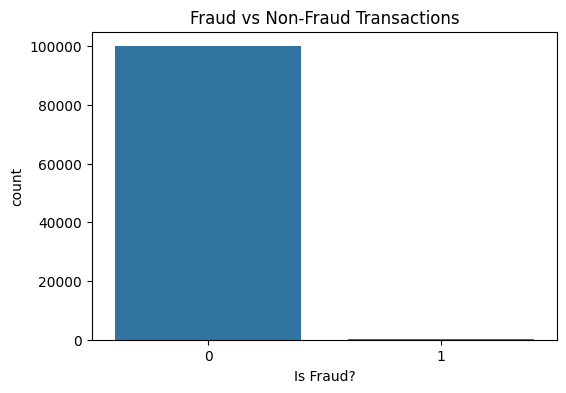

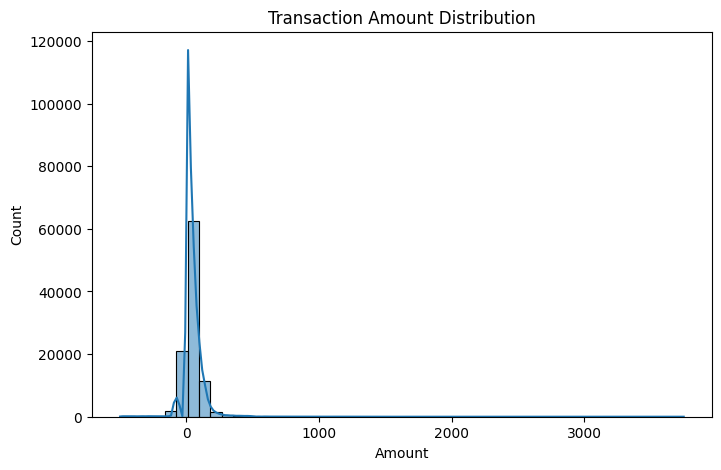

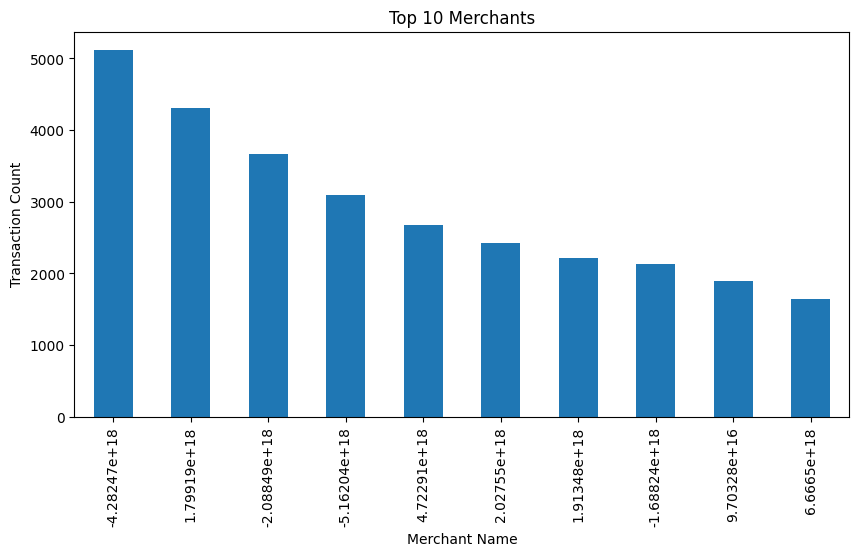

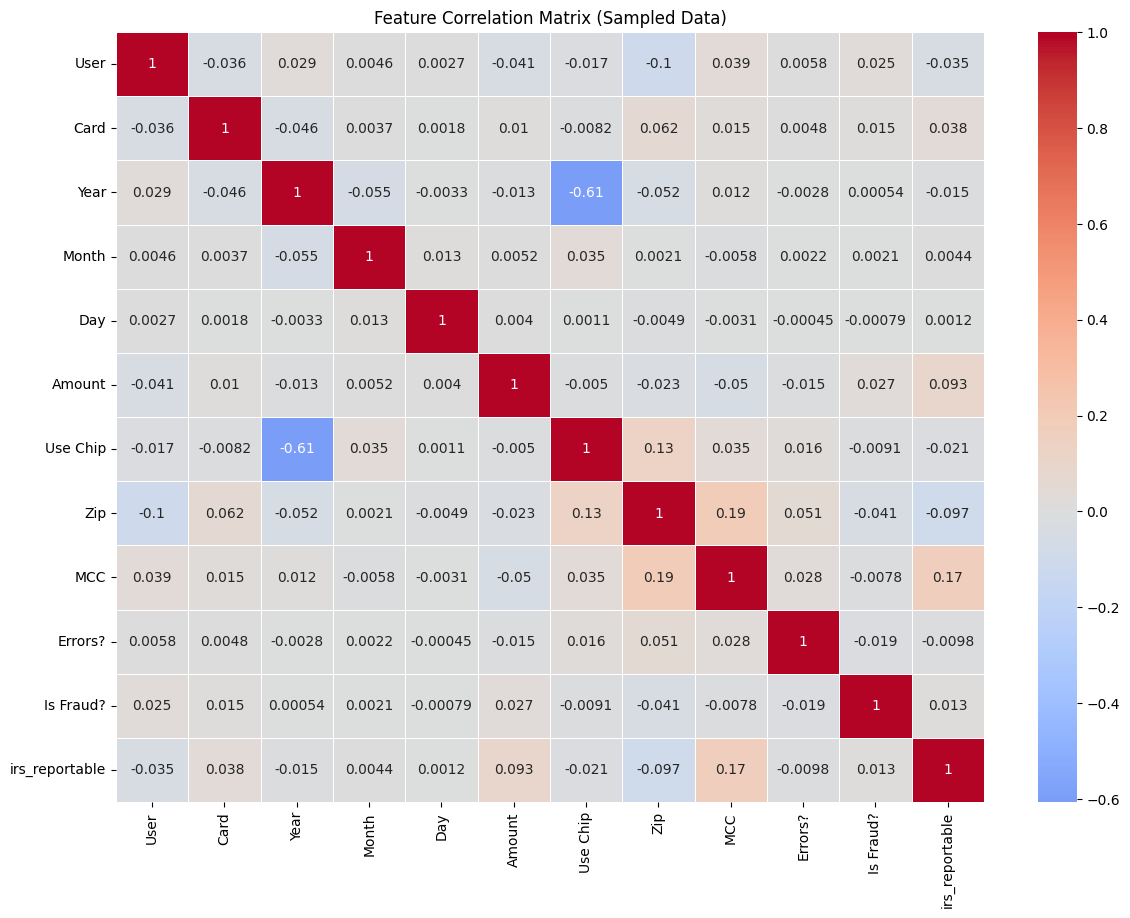

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# ✅ Load Dataset
df = pd.read_csv('merged_dataset.csv', low_memory=False)

# ✅ Convert 'Amount' to numeric
df['Amount'] = pd.to_numeric(df['Amount'].str.replace('$', '', regex=False), errors='coerce')

# ✅ Encode Binary Columns
le = LabelEncoder()
binary_columns = ['Use Chip', 'Errors?', 'Is Fraud?', 'irs_reportable']
for col in binary_columns:
    df[col] = le.fit_transform(df[col].astype(str))

# ✅ One-Hot Encode Categorical Columns
df = pd.get_dummies(df, columns=['Merchant City', 'Merchant State', 'irs_description'], drop_first=True)

# ✅ Treat 'Merchant Name' as Categorical (not numeric)
df['Merchant Name'] = df['Merchant Name'].astype(str)

# ✅ Sample 10% of the data for EDA (optional for faster processing)
df_sample = df.sample(frac=0.1, random_state=42)

# 📊 Basic Info
print(df_sample.info())
print(df_sample.describe())

# 📊 Fraud vs Non-Fraud Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Is Fraud?', data=df_sample)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

# 📊 Amount Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_sample['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# 📊 Merchant Name Frequency (Top 10)
plt.figure(figsize=(10,5))
df_sample['Merchant Name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Merchants')
plt.xlabel('Merchant Name')
plt.ylabel('Transaction Count')
plt.show()

# 📊 Correlation Heatmap (Ignoring String-Based Columns)
numeric_df = df_sample.select_dtypes(include=['number'])
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Feature Correlation Matrix (Sampled Data)')
plt.show()


In [16]:
# # ✅ Sample 10% of the data to avoid memory issues
# df_sample = df.sample(frac=0.1, random_state=42)

# # ✅ Select only numeric columns
# numeric_df = df_sample.select_dtypes(include=['number'])

# # ✅ Compute Correlation Matrix
# plt.figure(figsize=(14, 10))
# corr_matrix = numeric_df.corr()

# # ✅ Plot Correlation Heatmap
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
# plt.title('Optimized Correlation Matrix (Numeric Features Only)')
# plt.show()




this is giving memory error

In [17]:
# # ✅ Compute fraud rate per merchant
# merchant_fraud_rate = df.groupby('Merchant Name')['Is Fraud?'].mean().reset_index()
# merchant_fraud_rate.rename(columns={'Is Fraud?': 'merchant_fraud_rate'}, inplace=True)

# # ✅ Merge fraud rate back into the main dataframe
# df = pd.merge(df, merchant_fraud_rate, on='Merchant Name', how='left')

# # ✅ Drop original 'Merchant Name' to avoid treating it as numeric
# df.drop('Merchant Name', axis=1, inplace=True)

# # ✅ Optimize memory usage before correlation
# df = df.astype('float32')

# # ✅ Compute and plot the correlation matrix using the full dataset
# plt.figure(figsize=(14, 10))
# corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
# plt.title('Full Correlation Matrix (with Merchant Fraud Rate)')
# plt.show()


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ✅ Sample 5% to avoid memory errors
df_sample = df.sample(frac=0.05, random_state=42)



In [19]:
# ✅ Separate features and target
X = df_sample.drop('Is Fraud?', axis=1)
y = df_sample['Is Fraud?']

In [20]:
# ✅ Handle Mixed Data Types (convert to object first)
X = X.astype('object')

In [21]:
# ✅ One-Hot Encode Categorical Columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
if categorical_columns:
    X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

In [22]:
# ✅ Convert to float32 for memory efficiency
X = X.astype(np.float32)

In [23]:
# ✅ Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# ✅ Reshape for CNN (adding extra dimensions as required)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1, 1)

In [25]:
# ✅ Print final shape to confirm
print(f"Reshaped Data Shape: {X_reshaped.shape}")

Reshaped Data Shape: (50000, 22606, 1, 1)


Building the CNN model

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
# ✅ Build CNN Model with corrected kernel size
model = Sequential([
    Conv2D(32, kernel_size=(1, 1), activation='relu', input_shape=(X_reshaped.shape[1], X_reshaped.shape[2], X_reshaped.shape[3])),
    MaxPooling2D(pool_size=(1, 1)),  # Adjusted pooling to avoid size reduction
    Conv2D(64, kernel_size=(1, 1), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),  # ✅ Prevent overfitting
    Dense(1, activation='sigmoid')  # ✅ For binary classification
])


C:\Users\nihar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


IMPORTANT


Logistic

In [40]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# Convert DataFrame to NumPy array and flatten
X_flat = X.values.reshape(X.shape[0], -1)  # Flatten each sample into a 1D array

# TruncatedSVD with fewer components and limited iterations
svd = TruncatedSVD(n_components=10, n_iter=1, random_state=42)  # Fast with small batches
X_reduced = svd.fit_transform(X_flat)

print("Reduced shape:", X_reduced.shape)

# Train a simple classifier (Logistic Regression for speed)
clf = LogisticRegression(max_iter=100, random_state=42)
clf.fit(X_reduced, y)

# Predictions
y_pred = clf.predict(X_reduced)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)


Reduced shape: (50000, 10)
Confusion Matrix:
 [[49950     0]
 [   50     0]]


In [42]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
# Precision, Recall, F1 Score, and Accuracy
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
accuracy = accuracy_score(y, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Accuracy: 0.9990


C:\Users\nihar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
# from keras import backend as K

# # ✅ Clear TensorFlow Session to free memory
# K.clear_session()

# # ✅ Reduce Batch Size & Remove MaxPooling
# model = Sequential([
#     Conv2D(32, kernel_size=(1, 1), activation='relu', input_shape=(X_reshaped.shape[1], X_reshaped.shape[2], X_reshaped.shape[3])),
#     Conv2D(64, kernel_size=(1, 1), activation='relu'),  # Removed MaxPooling
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.3),  # Prevent overfitting
#     Dense(1, activation='sigmoid')  # Binary classification
# ])

# # ✅ Compile Model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # ✅ Early Stopping
# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # ✅ Train with reduced batch size
# history = model.fit(X_reshaped, y, epochs=1, batch_size=5, validation_split=0.2)


# # ✅ Plot Results
# plt.figure(figsize=(12, 5))
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Val Accuracy')
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.title('CNN Training & Validation Metrics')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy/Loss')
# plt.legend()
# plt.show()


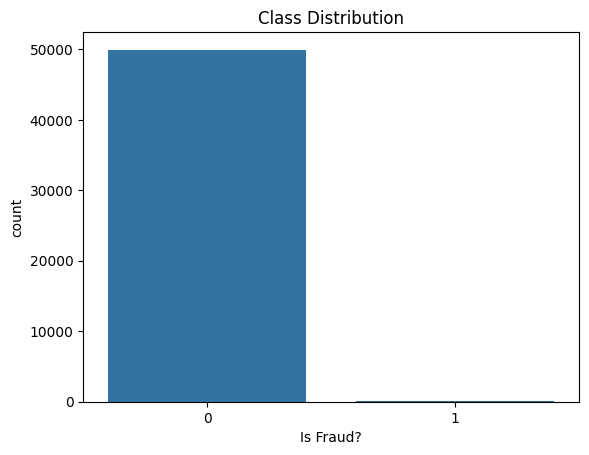

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y' is your target variable
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()
